<a href="https://colab.research.google.com/github/RajuNaik29/Exploratory-Data-Analysis/blob/main/T_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center" width="100%">
    <tr>
        <td width="35%">
            <img src="https://www.investopedia.com/thmb/yc7LDieTkD3dl9GYFmvMsNHNfy0=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/t-test_final2-d26bbb129cc441c192ccf8e784ae06a4.png">
        </td>
        <td>
            <div align="center">
                <font color="#7F0542" size="6">
                    <b>T - test</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## <font color='red'>**Please note that any topics that are not covered in today's lecture will be covered in the next lecture.**</font>

## <font color='blue'>**Content**</font>


1. Recap Framework
3. T-Test using 1 sample
4. T-Test using 2 samples
5. Paired T-Test

## <font color='blue'>Recap Framework for Hypothesis Testing</font>


We start any Hypothesis Testing problem with 2 things:
- Assumption
- Data

There is a framework to compute a quantifiable metric that helps decide if we should accept or reject our null hypothesis.


<font color='purple'>**Let's summarise it into steps:-**</font>

1. Setup Null and Alternate Hypothesis
2. Choose the distribution (Gaussian, Binomial, etc), and hence the test statistic.
3. Select the Left vs Right vs Two-Tailed test, as per the hypothesis
4. Compute the P-Value
5. Compare the P-Value to the Significance Level (α) and Fail to reject/reject the Null Hypothesis accordingly.

---

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<font color='purple'>Question</font>


```
A french cake shop claims that the average number of pastries they can produce in a day exceeds 500.
The average number of pastries produced per day over a 70 day period was found to be 530.
Assume that the population standard deviation for the pastries produced per day is 125.

Test the claim using a z-test with the critical z-value = 1.64 at the alpha (significance level) = 0.05, and state your interpretation.
```

##### <font color='green'>**STEP 1:**</font>

> **What should be the null and alternate hypothesis?**

- Null Hypothesis ($H_0$): $μ = 500$
- Alternative Hypothesis ($H_a$): $μ > 500$

Some people may also write the null hypothesis as: $μ <= 500$
- But this would be wrong, due to a small technical issue
- Essentially by doing so, we're saying that there is a distribution whose mean is `less than or equal to 500`. You won't be able to do anything with this information.
- Clearly, that would be wrong.
- Rather, if we say that it is specifically `μ = 500`, then that works.

Also, note that the burden of proof lies on the Alternate hypothesis.

##### <font color='green'>**STEP 2:**</font>

> **Choosing the right test statistic and its distribution.**

- We know that for 70 days, the average was 530.
- If this was the sample mean, under the assumption of the Null hypothesis

> **What would be the std dev for this sample?**

$σ_m = \frac{125}{\sqrt{70}}$, Assuming the population mean to be 500 (as per our null hypothesis)

<br>

Also, for test statistic, we will choose the Z score.

##### <font color='green'>**STEP 3:**</font>

> **Left side or Right side or Two-tailed?**

This can be answered by noticing the alternate hypothesis.

Since it's asking to check for the right side (μ > 500), we will perform **Right Tailed Test**.

##### <font color='green'>**STEP 4:**</font>

**Calculating P-value**

Let's calculate the z-score for `x = 530`

- $z = \frac{530 - 500}{\frac{125}{\sqrt{70}}}$

In [ ]:
z_stat = (530 - 500) / (125/np.sqrt(70))
z_stat

2.007984063681781

In [ ]:
from scipy.stats import norm

pvalue = 1 - norm.cdf(z_stat)
pvalue

0.022322492581293485

##### <font color='green'>**STEP 5:**</font>

**Compare with significance level**

In [ ]:
alpha = 0.05

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Reject H0


Therefore, we say that the average number of pastries that the bakery can produce in a day exceeds 500.

Let's also find

#### <font color='purple'>Critical Point</font>

First, find the corresponding z-score for 95% confidence

This is also given in the question.

In [ ]:
z = norm.ppf(0.95)
z

1.6448536269514722

Since, $z = \frac{x - μ_m}{σ_m}$

- $x = z*σ_m + μ_m = 1.64 * \frac{125}{\sqrt{70}} + 500$

In [ ]:
x = 500 + (z*(125/np.sqrt(70)))
x

524.574701413748

This means that if the bakery produces a daily average of at least 524.57 pastries for 70 days, we will reject the null hypothesis, and accept their claim of producing $> 500$ pastries every day, with a 95% confidence.

> <font color='purple'>**What will be the p-value when observed sales average value is 540?**</font>

In [ ]:
z = (540 - 500) / (125/np.sqrt(70))
1 - norm.cdf(z)

0.0037107735265998754

---

## <font color='blue'>One sample T-test</font>



<font color='purple'>**Let's say you are a Research Scientist working on a new cognitive enhancement pill**</font>

- The goal is to develop a pill that can significantly improve IQ scores in individuals.

- You believe that the new pill will lead to a significant increase in average IQ scores for the population.

<font color='purple'>**Testing the Pill's Effectiveness:**</font>

**Case 1:** The new pill may increase the average IQ scores.

- By enhancing cognitive functions, individuals taking the pill may show improved performance in IQ tests.

**Case 2:** The new pill may have no significant effect on IQ scores.

- The researchers need to verify whether the pill is effective or not before widespread use.

<font color='purple'>**Testing the Hypothesis:**</font>

- Researchers need a way to test whether the new pill has a significant impact on IQ scores.
- This involves comparing the average IQ scores of a group taking the pill with those of a control group not taking the pill.

<br>

<font color='purple'>**Why Not Z-test:**</font>

**Scenario Complexity:**

- In the real world, the standard deviation of IQ scores in the population is often unknown.

- The Z-test requires knowledge of the population standard deviation, which may not be practical or feasible to obtain.

**Sample Size:**

- When dealing with small sample sizes, the use of the t-test is more appropriate as it accounts for the increased uncertainty associated with smaller samples.

<font color='purple'>**Enter T-test:**</font>

The T-test for Samples can help assess whether there is a statistically significant difference in mean IQ scores between the group taking the new pill and the control group.

- This test allows researchers to evaluate the effectiveness of the cognitive enhancement pill before making it available to the wider population.
- It ensures that decisions about the pill are based on sound statistical evidence rather than assumptions.

The motivation for the T-test in this scenario is to rigorously test whether the new cognitive enhancement pill has the desired impact on IQ scores, providing a reliable basis for decision-making before its widespread application.

The choice of the t-test over the z-test is driven by the complexities of the real-world scenario and the practical considerations associated with sample size and population standard deviation.

### <font color='purple'>Use Case: Improve IQ with Pill</font>


Suppose that the average IQ of the population is 100

A researcher claims that his pill will improve IQ

> <font color='purple'>**What is the first thing that you will do?**</font>

Collect data/evidence, and then try to test if his hypothesis is correct.

In [ ]:
# The pill is given to a few people and their IQ is tested with following results:
iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

Let's see the mean IQ of this sample

In [ ]:
np.mean(iq_scores)

103.5

> <font color='purple'>The mean seems to be $> 100$, can we directly say that okay this pill is effective?</font>

- No.
- The sample size is small. Data is not enough.

<br>

Before making any such claim, we'd want to be 99% confident ($α = 0.01$)

In this context when
- We have very little data
- We do not know that the standard deviation

We will use a test called **T Test**.

<br>

There are 3 types of T-tests:-
- With 1 sample
 - Here, You have a bunch of samples that you are comparing with a single number
- With 2 samples where samples are independent
- With 2 samples where samples are dependent

In our problem, we are only given
- Population mean: 100 (a single number)
- One set of sample IQ values: `[110, 105, 98, 102, 99, 104, 115, 95]`

Such a case is called **One Sample T Test**

<br>


Alternately, suppose 2 schools are competing, and we have avg IQs from both schools A and B.

In that context, we'd have used **Two Sample T Test**.

> <font color='purple'>**What are the null and alternate hypothesis?**</font>

- $H_0: μ = 100$ (pill has no effect)
- $H_a: μ > 100$ (pill has positive effect)

> <font color='purple'>**Can we plot the distribution?**</font>

- No.
- We know that the sample mean is 100
- But we do not know the sample standard deviation (std error) or population standard deviation.

<br>

Moreover, if we had that, we would've easily computed the z-score corresponding to $x = 103.5$ and then the pvalue

But this is not possible here. We **cannot use z-score / z-statistic**

> <font color='purple'>**What to do now?**</font>

We do not have a population standard deviation, so we cannot evaluate it for the sample, as per CLT.

However, we are given the sample, so we can compute the **sample standard deviation ($s$).**

When we do that, we will get: $\frac{x - μ}{\frac{s}{\sqrt{n}}}$

- $n$: sample size
- $s$: sample standard deviation

This is **NOT the z-score anymore**, in fact, it is known as the **T-Statistic** that yields **T Distribution**

This modified framework is called **T Test**.

In this framework of T-test, we no longer need to use `.cdf(), .pdf(), etc`.

We will use a one-line code, where we directly use the existing function from scipy.

We need to call it: `ttest_1samp(sample, 100)`
- Here, 100 is the number we want to compare, as per the null hypothesis.

As a result, it will give us:
- T statistic value
- p-value

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
t_stat, pvalue = ttest_1samp(iq_scores, 100)
t_stat, pvalue

(1.5071573172061195, 0.1754994493585011)

In [ ]:
alpha = 0.01 # 99% confidence

if pvalue < alpha:
  print('Reject H0; Pill has effect')
else:
  print ('Fail to Reject H0; Pill has NO effect')

Fail to Reject H0; Pill has NO effect


---

## <font color='blue'>Two sample T-test</font>

<font color='purple'>Suppose we have IQ data samples across 2 schools, and we want to compare and see which school's students have better IQ</font>
- Use α = 0.05

<br>


In [1]:
!wget --no-check-certificate https://drive.google.com/uc?id=1qSiKRk_9fNmTWsEDWqOygwcGrU-XuINw -O iq_two_schools.csv

--2024-04-08 05:40:53--  https://drive.google.com/uc?id=1qSiKRk_9fNmTWsEDWqOygwcGrU-XuINw
Resolving drive.google.com (drive.google.com)... 142.251.162.100, 142.251.162.138, 142.251.162.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.162.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1qSiKRk_9fNmTWsEDWqOygwcGrU-XuINw [following]
--2024-04-08 05:40:53--  https://drive.usercontent.google.com/download?id=1qSiKRk_9fNmTWsEDWqOygwcGrU-XuINw
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.211.132, 2607:f8b0:400c:c10::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.211.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 639 [application/octet-stream]
Saving to: ‘iq_two_schools.csv’

iq_two_schools.csv  100%[===================>]     639  --.-KB/s    in 0s      

2024-04-08 05:40:54 (7.84 MB/s) 

In [2]:
import pandas as pd

df_iq = pd.read_csv('/content/iq_two_schools.csv')
df_iq.head()

,School,iq
0,school_1,91
1,school_1,95
2,school_1,110
3,school_1,112
4,school_1,115


Let's see the mean IQs of these schools

In [10]:
df_iq.groupby('School')['iq'].mean()

School
school_1    101.153846
school_2    109.416667
Name: iq, dtype: float64

> <font color='purple'>**What are the null and alternate hypothesis?**</font>

There are 3 ways in which we can set them:

<font color='purple'>1. Option 1</font>
 - $H_0$: Both school's students have the same IQ $\mu_1 = \mu_2$
 - $H_a$: Both school's students DO NOT have the same IQ $\mu_1 \neq \mu_2$

<font color='purple'>2. Option 2</font>
 - $H_0$: Both school's students have the same IQ $\mu_1 = \mu_2$
 - $H_a$: School A has higher IQ than School B $\mu_1 > \mu_2$

<font color='purple'>3. Option 3:</font>
 - $H_0$: Both school's students have the same IQ $\mu_1 = \mu_2$
 - $H_a$: School B has a higher IQ than school A $\mu_1 < \mu_2$

Note that here, options 1 and 3 are still viable, but option 2 cannot be true as we saw
- $μ_1 = 101$
- $μ_2 = 109$

<br>

Let's explore all these cases.

### <font color='purple'>Option 1:</font> $H_a: \mu_1 \neq \mu_2$

Earlier, we had a single sample to be compared with a single value (100).

Now, we are comparing 2 sets of samples with each other.

This is known as the **Two Sample T-Test**.

So, we will import it from `scipy` as:

In [ ]:
from scipy.stats import ttest_ind

`ind` stands for **independent**, meaning that the 2 sets of samples are independent.



First, let's store the IQs of 2 schools in separate variables.


In [11]:
iq_1 = df_iq[df_iq['School'] == 'school_1']['iq']
iq_2 = df_iq[df_iq['School'] == 'school_2']['iq']

iq_1

0      91
1      95
2     110
3     112
4     115
5      94
6      82
7      84
8      85
9      89
10     91
11     91
12     92
13     94
14     99
15     99
16    105
17    109
18    109
19    109
20    110
21    112
22    112
23    113
24    114
25    114
Name: iq, dtype: int64

Performing the 2 sample T-test

In [ ]:
t_stat, pvalue = ttest_ind(iq_1, iq_2)
t_stat, pvalue

(-2.4056474861512704, 0.02004552710936217)

In [ ]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Reject H0


### <font color='purple'>Option 2:</font> $H_a: \mu_1 > \mu_2$

> **In this case should the p-value be high or low?**

A lower p-value means getting closer to rejecting the null hypothesis.

In this case, the p-value should be higher.

<Br>

> **What changes will we make to the code to incorporate this alternate hypothesis?**

Since $H_a: \mu_1 > \mu_2$, we will add parameter `alternative = "greater"` to the `ttest_ind`

In [ ]:
t_stat, pvalue = ttest_ind(iq_1, iq_2, alternative = "greater")
t_stat, pvalue

(-2.4056474861512704, 0.9899772364453189)

In [ ]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Fail to Reject H0


<font color='red'>Note:</font> The p-value is very close to 1, as expected.

### <font color='purple'>Option 3:</font> $H_a: \mu_1 < \mu_2$

Here we will put `alternative = "less"`

In [ ]:
t_stat, pvalue = ttest_ind(iq_1, iq_2, alternative = "less")
t_stat, pvalue

(-2.4056474861512704, 0.010022763554681085)

In [ ]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Reject H0


> <font color='purple'>**What does changing the** `alternative` **parameter achieve?**</font>

It determines which tailed test is to be performed, thereby changing the computation of the p-value.

- `greater`: Right-tailed test (Option2)
- `less`: Left-tailed test (Option3)
- `two-sided`: Two-tailed test (Option1)

---


### <font color='purple'>Cricket Example</font>

In [12]:
!wget --no-check-certificate https://drive.google.com/uc?id=1bvVVbWUu6JKQDol0xwj3pqsTs4Qxm_oj -O Sachin_ODI.csv

--2024-04-08 05:55:35--  https://drive.google.com/uc?id=1bvVVbWUu6JKQDol0xwj3pqsTs4Qxm_oj
Resolving drive.google.com (drive.google.com)... 142.251.162.113, 142.251.162.138, 142.251.162.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.162.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bvVVbWUu6JKQDol0xwj3pqsTs4Qxm_oj [following]
--2024-04-08 05:55:35--  https://drive.usercontent.google.com/download?id=1bvVVbWUu6JKQDol0xwj3pqsTs4Qxm_oj
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.212.132, 2607:f8b0:400c:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.212.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26440 (26K) [application/octet-stream]
Saving to: ‘Sachin_ODI.csv’

Sachin_ODI.csv      100%[===================>]  25.82K  --.-KB/s    in 0.001s  

2024-04-08 05:55:36 (38.4 MB

In [13]:
df = pd.read_csv('/content/Sachin_ODI.csv')
df

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,14,0,34,15,2,0,93.33,2,Australia,Sydney,2012-02-26,Australia,False,False
356,39,0,45,30,5,0,130.00,2,Sri Lanka,Hobart,2012-02-28,India,True,False
357,6,0,25,19,1,0,31.57,1,Sri Lanka,Dhaka,2012-03-13,India,True,False
358,114,0,205,147,12,1,77.55,1,Bangladesh,Dhaka,2012-03-16,Bangladesh,False,True


Now based on this dataset, we will analyze and answer a few questions using our statistical tools.

#### <font color='purple'>Batting pattern in first and second Innings</font>

First, let's look at the respective means.

In [18]:
df.groupby('Inns')['runs'].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64



This is a typical example of the T-test.

Let's find out if it is a coincidence or is it significant difference.

<br>

> <font color='purple'>**What will be the null and alternate hypothesis?**</font>

Let the average runs scored in the first and second innings be $μ_1$ and $μ_2$ respectively.

- $H_0: μ_1 = μ_2$

For the alternate hypothesis, we have a sense that maybe the runs scored in the first innings are greater than in the second innings.

So we can set it like:
- $H_a: μ_1 > μ_2$

In [26]:
df_first_innings = df[df['Inns'] == 1]
df_second_innings = df[df['Inns'] == 2]

<font color='purple'>Performing T-test</font>

In [27]:
from scipy.stats import ttest_ind

# Assuming the columns containing runs data are named 'runs' in both DataFrames
t_stat, pvalue = ttest_ind(df_first_innings['runs'], df_second_innings['runs'], alternative="greater")
print("T-statistic:", t_stat)
print("P-value:", pvalue)


T-statistic: 1.4612016295532178
P-value: 0.07241862097379981


In [ ]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
  print('First innings is better')
else:
  print ('Fail to Reject H0')
  print('Difference we observe is just chance')

Fail to Reject H0
Difference we observe is just chance



#### Batting pattern when the team won vs lost

In [ ]:
df.groupby('Won')['runs'].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

This seems to be a significant difference.

Let's check using T-test

In [29]:
df_won = df[df['Won'] == True]
df_lost = df[df['Won'] == False]

> <font color='purple'>**What are null and alternate hypothesis?**</font>

- $H_0: μ_1 = μ_2$, i.e. No difference in batting, irrespective of win or loss
- $H_a: μ_1 > μ_2$, i.e. better batting when match is won

<br>

Performing the test.

In [30]:
t_stat, pvalue = ttest_ind(df_won['runs'], df_lost['runs'], alternative = "greater")
t_stat, pvalue

(3.628068563969343, 0.00016353077486826558)

In [31]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
  print('Better scores when team won the match')
else:
  print ('Fail to Reject H0')
  print('Difference we observe is just chance')

Reject H0
Better scores when team won the match


The obtained pvalue was very small, making it highly unlikely for the difference to be a coincidence.

Therefore we conclude that the columns
- `runs` and `Won` have a good relationship between them.
- Whereas, `runs` and `Inns`  did not.

---

Another context in which people often use T-tests is

### <font color='purple'>Drug Recovery Time Example</font>

Suppose there are 2 competing companies that have created a drug for tackling the same disease.

A test was conducted using these 2 drugs on a group of people and you are given the same in the following data.

<font color='purple'>Which drug is more effective?</font>

In [32]:
!wget --no-check-certificate https://drive.google.com/uc?id=1aTrYo2_PIeYcg8Fvpr5m2GYAXiPvvOmz -O drug_1_recovery.csv

--2024-04-08 06:06:35--  https://drive.google.com/uc?id=1aTrYo2_PIeYcg8Fvpr5m2GYAXiPvvOmz
Resolving drive.google.com (drive.google.com)... 142.251.162.100, 142.251.162.113, 142.251.162.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.162.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1aTrYo2_PIeYcg8Fvpr5m2GYAXiPvvOmz [following]
--2024-04-08 06:06:35--  https://drive.usercontent.google.com/download?id=1aTrYo2_PIeYcg8Fvpr5m2GYAXiPvvOmz
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.211.132, 2607:f8b0:400c:c10::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.211.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1102 (1.1K) [application/octet-stream]
Saving to: ‘drug_1_recovery.csv’

drug_1_recovery.csv 100%[===================>]   1.08K  --.-KB/s    in 0s      

2024-04-08 06:06:35 (97

In [33]:
d1 = pd.read_csv('/content/drug_1_recovery.csv')
d1

,drug_1
0,8.824208
1,7.477745
2,7.557121
3,7.981314
4,6.827716
...,...
95,6.890506
96,7.725759
97,6.848016
98,7.969997


In [34]:
d1.mean()

drug_1    7.104917
dtype: float64

Now, for Drug 2

In [35]:
!wget --no-check-certificate https://drive.google.com/uc?id=1YgAgnzkfiCFz_kSO6BPPLCYAB2K5VwXG -O drug_2_recovery.csv

--2024-04-08 06:06:56--  https://drive.google.com/uc?id=1YgAgnzkfiCFz_kSO6BPPLCYAB2K5VwXG
Resolving drive.google.com (drive.google.com)... 142.251.162.100, 142.251.162.113, 142.251.162.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.162.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1YgAgnzkfiCFz_kSO6BPPLCYAB2K5VwXG [following]
--2024-04-08 06:06:56--  https://drive.usercontent.google.com/download?id=1YgAgnzkfiCFz_kSO6BPPLCYAB2K5VwXG
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.211.132, 2607:f8b0:400c:c10::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.211.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1328 (1.3K) [application/octet-stream]
Saving to: ‘drug_2_recovery.csv’

drug_2_recovery.csv 100%[===================>]   1.30K  --.-KB/s    in 0s      

2024-04-08 06:06:57 (93

In [36]:
d2 = pd.read_csv('/content/drug_2_recovery.csv')
d2

,drug_2
0,9.565974
1,7.492915
2,8.738418
3,7.635235
4,4.125593
...,...
115,7.861993
116,8.233510
117,5.876257
118,7.789454


In [37]:
d2.mean()

drug_2    8.073423
dtype: float64

This presents a similar problem to what we've seen till now.

> <font color='purple'>**What will be the Null and Alternate Hypothesis?**</font>

We observe that the recovery time of drug 1 seems better (less no of days).

So we define a hypothesis as:
- $H_0: μ_1 = μ_2$
- $H_a: μ_1 < μ_2$

Based on this we can perform Two sample T-test.

In [38]:
t_stat, pvalue = ttest_ind(d1, d2, alternative = "less")
t_stat, pvalue

(array([-5.32112438]), array([1.27713574e-07]))

In [ ]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
  print('First drug has less recovery time.')
else:
  print ('Fail to Reject H0')
  print('Both have same recovery time')

Reject H0
Better scores when team won the match


---

Let's take a look at the Aerofit Case Study, that you'd have already seen.

### <font color='purple'>Aerofit Case Study</font>

In [39]:
!wget --no-check-certificate https://drive.google.com/uc?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD -O aerofit.csv

--2024-04-08 06:08:47--  https://drive.google.com/uc?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD
Resolving drive.google.com (drive.google.com)... 142.251.162.113, 142.251.162.139, 142.251.162.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.162.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD [following]
--2024-04-08 06:08:47--  https://drive.usercontent.google.com/download?id=1fSKOoZcIfLTFMvyQ37RvGH168g5nVMDD
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.211.132, 2607:f8b0:400c:c10::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.211.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7461 (7.3K) [application/octet-stream]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.29K  --.-KB/s    in 0s      

2024-04-08 06:08:48 (29.8 MB/s)

In [40]:
df = pd.read_csv('/content/aerofit.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


**Objective:**
- Come up with insights based on this data.
- Find relations between different variables.

> <font color='purple'>**Did you notice?**</font>

In all the examples we've solved while performing the T-test, we've done a **numeric variable vs. a categorical variable (having 2 categories only).**

For e.g.,:
 - Runs (num.) for 1st and 2nd innings (cat.)
 - Runs (num.) for when the match is won/lost (cat.)
 - Recovery time (num.) of Drug 1 vs Drug 2 (cat.)

T-test can only be used in this situation only, i.e. when analysing between one numerical and one categorical (having 2 categories) features.



So, in the Aerofit data, such scenarios can be compared using T-test.

For e.g.,:
- Income vs Gender
 - To analyze the difference in average salaries of men and women

#### <font color='purple'>Gender vs Income</font>

Let's visualize using boxplot

<Axes: xlabel='Gender', ylabel='Income'>

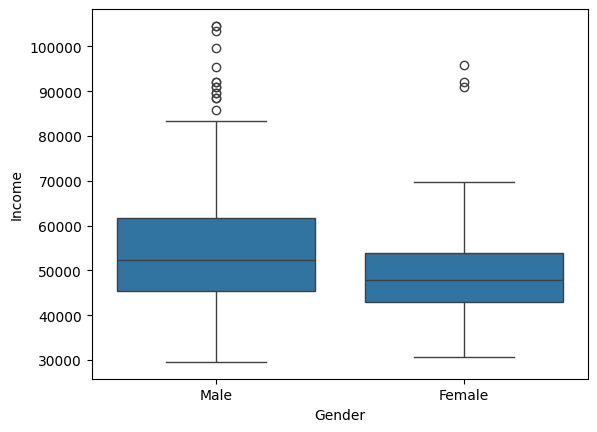

In [42]:
import seaborn as sns

sns.boxplot(x='Gender', y='Income', data=df)

From this plot, it seems that the salaries of men are more than that of women on average.

Let's test the same using the T-test.

> <font color='purple'>**Null and Alternate hypothesis**</font>

If $μ_1$ is average income of men, and $μ_2$ is of women,

- $H_0: μ_1 = μ_2$
- $H_a: μ_1 > μ_2$

In [ ]:
income_male = df[df['Gender'] == 'Male']['Income']
income_female = df[df['Gender'] == 'Female']['Income']

In [ ]:
income_male.mean()

56562.75961538462

In [ ]:
income_female.mean()

49828.90789473684

<font color='purple'>Performing T-test</font>

In [ ]:
t_stat, pvalue = ttest_ind(income_male, income_female, alternative="greater")
pvalue

0.003263631548607129

In [ ]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
  print('Men earn more than females.')
else:
  print ('Fail to Reject H0')

Reject H0
Men earn more than females.


---

<font color='purple'>**Note about T-test:**</font>

- If sample size $n > 30$, then the sample standard deviation will be very close to the value of standard error, i.e. $\frac{x - μ}{\frac{s}{\sqrt{n}}} \approx \frac{x - μ}{\frac{σ}{\sqrt{n}}}$
 - i.e. T-test and Z-test become essentially the same.
- If the number of samples is low, you go for a T-test
- If it is high, you can use either T test or Z test
- That's why, **`scipy` does not even have an implementation for Z-test.**

---


## <font color='blue'>Paired T-test</font>

<font color='purple'>**Recap Independent t-test**</font>

In the independent t-test, the comparison was between two separate and independent samples.

In this test, there are two sets of data, each representing a different group.

For example, it could be
- Two groups of individuals undergoing different treatments,
- Two employee groups with varying salaries, or
- Two groups of students with different IQ scores.

<br>

The t-test assesses whether the means of these two groups are significantly different from each other.

- In essence, the independent t-test helps you determine if the observed differences between the means of the two groups are likely due to actual differences in the populations they represent or if they could have occurred by chance.

<font color='purple'>**Paired T-test setup:**</font>

- A paired t-test is used when you have a situation where two sets of data points are not independent of each other, but rather they're **related in pairs.**

- This typically occurs when you're studying the impact of a treatment, intervention, or change within the same subjects over time or in some paired way.

- In your case, you're comparing "Before" and "After" measurements on an individual basis. For each person, you have two measurements:

  - **Person 1: Before and After**
  - **Person 2: Before and After**

- This setup allows you to directly analyze the difference between the paired measurements for each person, such as the change from "Before" to "After" for Person 1, and the change for Person 2, and so on.

- The paired t-test takes into account the paired nature of the data.

- It calculates the mean difference of the paired measurements and then assesses whether this mean difference is statistically significant from zero.

- This helps determine if there's a significant change between the "Before" and "After" measurements within each pair.

In contrast to the **Independent T-test** (one and two sample), that we saw, this is known as **Dependent T-test**

Let's solve an example

<font color='purple'>Will problem-solving sessions help students?</font>

Test 1: Before the session

Test 2: After the session

In [43]:
from scipy.stats import ttest_rel
import pandas as pd

In [44]:
!wget --no-check-certificate https://drive.google.com/uc?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae -O problem_solving.csv

--2024-04-08 06:22:06--  https://drive.google.com/uc?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae
Resolving drive.google.com (drive.google.com)... 142.251.162.101, 142.251.162.102, 142.251.162.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.162.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae [following]
--2024-04-08 06:22:06--  https://drive.usercontent.google.com/download?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1277 (1.2K) [application/octet-stream]
Saving to: ‘problem_solving.csv’

problem_solving.csv 100%[===================>]   1.25K  --.-KB/s    in 0s      

2024-04-08 06:22:07 (76.2

In [47]:
Path= '/content/problem_solving.csv'
df_ps = pd.read_csv(Path)
df_ps

,id,test_1,test_2
0,0,40,38
1,1,49,44
2,2,65,69
3,3,59,63
4,4,44,43
...,...,...,...
132,132,45,44
133,133,46,42
134,134,40,35
135,135,60,66


In [48]:
len(df_ps)

137

In [49]:
df_ps.head()

,id,test_1,test_2
0,0,40,38
1,1,49,44
2,2,65,69
3,3,59,63
4,4,44,43


In [50]:
df_ps.describe()

,id,test_1,test_2
count,137.000000,137.000000,137.000000
mean,68.000000,60.489051,62.430657
std,39.692569,17.080311,17.516293
min,0.000000,30.000000,27.000000
25%,34.000000,46.000000,48.000000
50%,68.000000,59.000000,62.000000
75%,102.000000,75.000000,77.000000
max,136.000000,89.000000,96.000000


> <font color='purple'>**Null and Alternate hypothesis**</font>

- Null Hypothesis ($H_0$): Problem-solving has no effect on the test scores.
  - In other words, the mean test scores before (test_1) and after (test_2) problem-solving are equal.

- Alternative Hypothesis ($H_a$): Problem-solving had an effect on the test scores.
  - This implies that the mean test scores before and after problem-solving are not equal.

### <font color='purple'>Option 1:</font> $H_a :\mu_{before} \neq \mu_{after}$

In [51]:
# H0: Problem-solving has no effect
# Ha: Problem-solving had an effect

statistic, pvalue = ttest_rel(df_ps["test_1"], df_ps["test_2"])
print("Test statistic:",statistic)
print("pvalue:",pvalue)

Test statistic: -5.502886353508166
pvalue: 1.795840353792313e-07


In [52]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Reject H0


### <font color='purple'>Option 2:</font> $H_a: \mu_{before} < \mu_{after}$

In [53]:
# H0: Problem solving has no effect
# Ha: Problem solving improved the scores

statistic, pvalue = ttest_rel(df_ps["test_1"], df_ps["test_2"],alternative="less")
print("Test statistic:",statistic)
print("pvalue:",pvalue)

Test statistic: -5.502886353508166
pvalue: 8.979201768961566e-08


In [ ]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Reject H0


### <font color='purple'>Option 3:</font> $H_a: \mu_{before} > \mu_{after}$

In [54]:
# H0: Problem solving has no effect
# Ha: Problem solving deteriorated the scores

statistic, pvalue = ttest_rel(df_ps["test_1"], df_ps["test_2"],alternative="greater")
print("Test statistic:",statistic)
print("pvalue:",pvalue)

Test statistic: -5.502886353508166
pvalue: 0.9999999102079823


In [ ]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Fail to Reject H0




---



---

